In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
keras.__version__

'2.4.0'

In [6]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Der Reuters-Datensatz ist ein Datensatz von Nachrichtenmeldungen, die sich in 46 verschiedene Themen einteilen lassen.

Eure Aufgabe ist es, analog zum IMDB-Datensatz ein Modell für die Klassifizierung der Reutersmeldungen zu trainieren.

* Schaut Euch eine dekodierte Meldung an.
* Vektorisiert die Daten und Targets
* Baut ein Modell: Vorsicht auf die Outputdimension = 46, activation nicht sigmoid sondern 'softmax', loss-function='sparse_categorical_crossentropy'
* Spaltet ein Validationset ab und benutzt es im Training
* Plottet Validation-Loss und Trainings-Loss um Overfitting zu diagnostizieren.
* Wenn Ihr mit Eurem Model glücklich seid --> Evaluiert es auf dem Testset.

# Lösung

In [7]:
np.max(train_labels)

45

In [8]:
# word_index is a dictionary mapping words to an integer index
word_index = reuters.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_message = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_message

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [11]:
x_train.shape

(8982, 10000)

In [12]:
x_test.shape

(2246, 10000)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, train_labels, 
    epochs=20, 
    batch_size=512,
    validation_split=0.2
)
results = model.evaluate(x_test, test_labels)

2022-04-12 14:05:14.197419: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-12 14:05:14.197655: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-12 14:05:14.672396: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
15/15 [==============================] - 2s 79ms/step - loss: 3.3056 - accuracy: 0.3667 - val_loss: 2.0469 - val_accuracy: 0.6082
Epoch 2/20
15/15 [==============================] - 0s 18ms/step - loss: 1.7994 - accuracy: 0.6528 - val_loss: 1.5056 - val_accuracy: 0.6839
Epoch 3/20
15/15 [==============================] - 0s 19ms/step - loss: 1.2821 - accuracy: 0.7287 - val_loss: 1.3087 - val_accuracy: 0.7117
Epoch 4/20
15/15 [==============================] - 0s 19ms/step - loss: 1.0556 - accuracy: 0.7694 - val_loss: 1.1851 - val_accuracy: 0.7284
Epoch 5/20
15/15 [==============================] - 0s 19ms/step - loss: 0.8635 - accuracy: 0.8095 - val_loss: 1.1195 - val_accuracy: 0.7429
Epoch 6/20
15/15 [==============================] - 0s 17ms/step - loss: 0.7172 - accuracy: 0.8423 - val_loss: 1.0813 - val_accuracy: 0.7585
Epoch 7/20
15/15 [==============================] - 0s 18ms/step - loss: 0.6120 - accuracy: 0.8747 - val_loss: 1.0556 - val_accuracy: 0.7585
Epoch 8/20
15

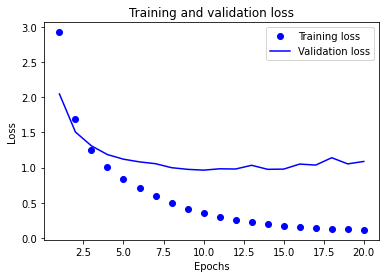

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

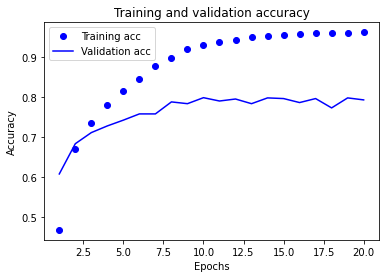

In [15]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()